In [1]:
test_path = r'C:\Users\User\Desktop\Geek Courses\Big Data\1st qrt\Python для Data Science\Урок 1\test.csv'
train_path = r'C:\Users\User\Desktop\Geek Courses\Big Data\1st qrt\Python для Data Science\Урок 1\train.csv'

In [2]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

In [3]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [6]:
df_train = pd.read_csv(train_path)
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [12]:
df_train.loc[df_train['Rooms'].isin([0, 10, 19])] = df_train['Rooms'].median()

In [19]:
df_train.loc[df_train['Square'] > 201] = df_train['Square'].median()

In [21]:
df_train.loc[df_train['Square'] < 15] = df_train['Square'].median()

In [31]:
df_train.loc[df_train['Rooms'] > 6] = df_train['Rooms'].median()

In [32]:
df_train.loc[df_train['Square'] < 15] = df_train['Square'].median()

In [33]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5218.000000,10000.000000,10000.000000,10000.000000
mean,8362.289747,50.449347,2.025347,56.177267,37.097850,6.404947,8.640547,12.724047,3.984930e+03,0.260140,24.776047,5340.453047,8.161347,1136.873031,1.457347,4.361147,213518.822901
std,4872.198338,43.552989,2.746841,18.843093,85.785165,28.659414,5.700000,7.063775,2.005003e+05,2.718897,17.566173,4009.892887,23.903585,1021.039770,3.044155,5.411703,93295.596067
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,5.246203e+01,0.000000,0.000000,52.462026,0.000000,0.000000,0.000000,0.000000,52.462026
25%,4141.500000,20.000000,1.000000,41.804025,22.827605,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153553.457623
50%,8380.500000,37.000000,2.000000,52.464245,32.821013,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.219881,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,52.462026,200.334539,7480.592129,2014.000000,52.462026,117.000000,2.005201e+07,52.462026,74.000000,19083.000000,141.000000,4849.000000,52.462026,52.462026,633233.466570


In [34]:
df_train.loc[df_train['Rooms'] > 6] = df_train['Rooms'].median()

In [35]:
df_train.loc[df_train['Square'] < 15] = df_train['Square'].median()

In [36]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5218.000000,10000.000000,10000.000000,10000.000000
mean,8362.289747,50.449347,2.025347,56.177267,37.097850,6.404947,8.640547,12.724047,3.984930e+03,0.260140,24.776047,5340.453047,8.161347,1136.873031,1.457347,4.361147,213518.822901
std,4872.198338,43.552989,2.746841,18.843093,85.785165,28.659414,5.700000,7.063775,2.005003e+05,2.718897,17.566173,4009.892887,23.903585,1021.039770,3.044155,5.411703,93295.596067
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,5.246203e+01,0.000000,0.000000,52.462026,0.000000,0.000000,0.000000,0.000000,52.462026
25%,4141.500000,20.000000,1.000000,41.804025,22.827605,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153553.457623
50%,8380.500000,37.000000,2.000000,52.464245,32.821013,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.219881,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,52.462026,200.334539,7480.592129,2014.000000,52.462026,117.000000,2.005201e+07,52.462026,74.000000,19083.000000,141.000000,4849.000000,52.462026,52.462026,633233.466570


In [37]:
df_train.loc[df_train['Rooms'] > 6] = df_train['Rooms'].median()

In [38]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.0000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,5218.00000,10000.000000,10000.000000,10000.000000
mean,8362.153500,50.313100,1.889100,56.041019,36.925189,6.2687,8.50430,12.58780,3.984794e+03,0.123892,24.639800,5340.31680,8.025100,1136.61192,1.321100,4.224900,213518.686654
std,4872.431437,43.625357,0.810843,19.050776,85.804851,28.5599,5.23499,6.77679,2.005003e+05,0.153866,17.546591,4010.07343,23.794241,1021.32352,1.491448,4.799523,93295.907878
min,0.000000,0.000000,1.000000,2.000000,0.370619,0.0000,1.00000,0.00000,2.000000e+00,0.000000,0.000000,2.00000,0.000000,0.00000,0.000000,0.000000,2.000000
25%,4141.500000,19.000000,1.000000,41.744710,22.719037,1.0000,4.00000,9.00000,1.974000e+03,0.017647,6.000000,1564.00000,0.000000,350.00000,0.000000,1.000000,153553.457623
50%,8380.500000,35.000000,2.000000,52.462026,32.729196,6.0000,7.00000,12.00000,1.977000e+03,0.075424,25.000000,5285.00000,2.000000,900.00000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.084102,9.0000,12.00000,17.00000,2.001000e+03,0.195781,36.000000,7227.00000,5.000000,1548.00000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,6.000000,200.334539,7480.592129,2014.0000,42.00000,117.00000,2.005201e+07,2.000000,74.000000,19083.00000,141.000000,4849.00000,6.000000,23.000000,633233.466570


In [39]:
df_train.loc[df_train['Square'] < 15] = df_train['Square'].median()

In [40]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5218.000000,10000.000000,10000.000000,10000.000000
mean,8362.289747,50.449347,2.025347,56.177267,37.097850,6.404947,8.640547,12.724047,3.984930e+03,0.260140,24.776047,5340.453047,8.161347,1136.873031,1.457347,4.361147,213518.822901
std,4872.198338,43.552989,2.746841,18.843093,85.785165,28.659414,5.700000,7.063775,2.005003e+05,2.718897,17.566173,4009.892887,23.903585,1021.039770,3.044155,5.411703,93295.596067
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,5.246203e+01,0.000000,0.000000,52.462026,0.000000,0.000000,0.000000,0.000000,52.462026
25%,4141.500000,20.000000,1.000000,41.804025,22.827605,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153553.457623
50%,8380.500000,37.000000,2.000000,52.464245,32.821013,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.219881,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,52.462026,200.334539,7480.592129,2014.000000,52.462026,117.000000,2.005201e+07,52.462026,74.000000,19083.000000,141.000000,4849.000000,52.462026,52.462026,633233.466570


In [41]:
df_train.to_csv(train_path, index=False, encoding='utf-8')

In [42]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5218.000000,10000.000000,10000.000000,10000.000000
mean,8362.289747,50.449347,2.025347,56.177267,37.097850,6.404947,8.640547,12.724047,3.984930e+03,0.260140,24.776047,5340.453047,8.161347,1136.873031,1.457347,4.361147,213518.822901
std,4872.198338,43.552989,2.746841,18.843093,85.785165,28.659414,5.700000,7.063775,2.005003e+05,2.718897,17.566173,4009.892887,23.903585,1021.039770,3.044155,5.411703,93295.596067
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,5.246203e+01,0.000000,0.000000,52.462026,0.000000,0.000000,0.000000,0.000000,52.462026
25%,4141.500000,20.000000,1.000000,41.804025,22.827605,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153553.457623
50%,8380.500000,37.000000,2.000000,52.464245,32.821013,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.219881,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,52.462026,200.334539,7480.592129,2014.000000,52.462026,117.000000,2.005201e+07,52.462026,74.000000,19083.000000,141.000000,4849.000000,52.462026,52.462026,633233.466570


In [43]:
df_train.loc[df_train['Rooms'] > 6] = df_train['Rooms'].median()

In [44]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.0000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,5218.00000,10000.000000,10000.000000,10000.000000
mean,8362.153500,50.313100,1.889100,56.041019,36.925189,6.2687,8.50430,12.58780,3.984794e+03,0.123892,24.639800,5340.31680,8.025100,1136.61192,1.321100,4.224900,213518.686654
std,4872.431437,43.625357,0.810843,19.050776,85.804851,28.5599,5.23499,6.77679,2.005003e+05,0.153866,17.546591,4010.07343,23.794241,1021.32352,1.491448,4.799523,93295.907878
min,0.000000,0.000000,1.000000,2.000000,0.370619,0.0000,1.00000,0.00000,2.000000e+00,0.000000,0.000000,2.00000,0.000000,0.00000,0.000000,0.000000,2.000000
25%,4141.500000,19.000000,1.000000,41.744710,22.719037,1.0000,4.00000,9.00000,1.974000e+03,0.017647,6.000000,1564.00000,0.000000,350.00000,0.000000,1.000000,153553.457623
50%,8380.500000,35.000000,2.000000,52.462026,32.729196,6.0000,7.00000,12.00000,1.977000e+03,0.075424,25.000000,5285.00000,2.000000,900.00000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.084102,9.0000,12.00000,17.00000,2.001000e+03,0.195781,36.000000,7227.00000,5.000000,1548.00000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,6.000000,200.334539,7480.592129,2014.0000,42.00000,117.00000,2.005201e+07,2.000000,74.000000,19083.00000,141.000000,4849.00000,6.000000,23.000000,633233.466570


In [45]:
df_train.to_csv(train_path, index=False, encoding='utf-8')

In [46]:
df_train = pd.read_csv(train_path)
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.0000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,5218.00000,10000.000000,10000.000000,10000.000000
mean,8362.153500,50.313100,1.889100,56.041019,36.925189,6.2687,8.50430,12.58780,3.984794e+03,0.123892,24.639800,5340.31680,8.025100,1136.61192,1.321100,4.224900,213518.686654
std,4872.431437,43.625357,0.810843,19.050776,85.804851,28.5599,5.23499,6.77679,2.005003e+05,0.153866,17.546591,4010.07343,23.794241,1021.32352,1.491448,4.799523,93295.907878
min,0.000000,0.000000,1.000000,2.000000,0.370619,0.0000,1.00000,0.00000,2.000000e+00,0.000000,0.000000,2.00000,0.000000,0.00000,0.000000,0.000000,2.000000
25%,4141.500000,19.000000,1.000000,41.744710,22.719037,1.0000,4.00000,9.00000,1.974000e+03,0.017647,6.000000,1564.00000,0.000000,350.00000,0.000000,1.000000,153553.457623
50%,8380.500000,35.000000,2.000000,52.462026,32.729196,6.0000,7.00000,12.00000,1.977000e+03,0.075424,25.000000,5285.00000,2.000000,900.00000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.084102,9.0000,12.00000,17.00000,2.001000e+03,0.195781,36.000000,7227.00000,5.000000,1548.00000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,6.000000,200.334539,7480.592129,2014.0000,42.00000,117.00000,2.005201e+07,2.000000,74.000000,19083.00000,141.000000,4849.00000,6.000000,23.000000,633233.466570


In [47]:
df_train.loc[df_train['Square'] < 15] = df_train['Square'].median()

In [48]:
df_train.to_csv(train_path, index=False, encoding='utf-8')

In [49]:
df_train = pd.read_csv(train_path)
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5218.000000,10000.000000,10000.000000,10000.000000
mean,8362.289747,50.449347,2.025347,56.177267,37.097850,6.404947,8.640547,12.724047,3.984930e+03,0.260140,24.776047,5340.453047,8.161347,1136.873031,1.457347,4.361147,213518.822901
std,4872.198338,43.552989,2.746841,18.843093,85.785165,28.659414,5.700000,7.063775,2.005003e+05,2.718897,17.566173,4009.892887,23.903585,1021.039770,3.044155,5.411703,93295.596067
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,5.246203e+01,0.000000,0.000000,52.462026,0.000000,0.000000,0.000000,0.000000,52.462026
25%,4141.500000,20.000000,1.000000,41.804025,22.827605,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153553.457623
50%,8380.500000,37.000000,2.000000,52.464245,32.821013,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.219881,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,52.462026,200.334539,7480.592129,2014.000000,52.462026,117.000000,2.005201e+07,52.462026,74.000000,19083.000000,141.000000,4849.000000,52.462026,52.462026,633233.466570


In [50]:
df_train.loc[df_train['Rooms'] > 6] = df_train['Rooms'].median()

In [51]:
df_train.to_csv(train_path, index=False, encoding='utf-8')

In [52]:
df_train = pd.read_csv(train_path)
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,7891.000000,10000.0000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,5218.00000,10000.000000,10000.000000,10000.000000
mean,8362.153500,50.313100,1.889100,56.041019,36.925189,6.2687,8.50430,12.58780,3.984794e+03,0.123892,24.639800,5340.31680,8.025100,1136.61192,1.321100,4.224900,213518.686654
std,4872.431437,43.625357,0.810843,19.050776,85.804851,28.5599,5.23499,6.77679,2.005003e+05,0.153866,17.546591,4010.07343,23.794241,1021.32352,1.491448,4.799523,93295.907878
min,0.000000,0.000000,1.000000,2.000000,0.370619,0.0000,1.00000,0.00000,2.000000e+00,0.000000,0.000000,2.00000,0.000000,0.00000,0.000000,0.000000,2.000000
25%,4141.500000,19.000000,1.000000,41.744710,22.719037,1.0000,4.00000,9.00000,1.974000e+03,0.017647,6.000000,1564.00000,0.000000,350.00000,0.000000,1.000000,153553.457623
50%,8380.500000,35.000000,2.000000,52.462026,32.729196,6.0000,7.00000,12.00000,1.977000e+03,0.075424,25.000000,5285.00000,2.000000,900.00000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,45.084102,9.0000,12.00000,17.00000,2.001000e+03,0.195781,36.000000,7227.00000,5.000000,1548.00000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,6.000000,200.334539,7480.592129,2014.0000,42.00000,117.00000,2.005201e+07,2.000000,74.000000,19083.00000,141.000000,4849.00000,6.000000,23.000000,633233.466570


In [54]:
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['LifeSquare'].median()

In [55]:
df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] = df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] * 0.63

In [56]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,5218.00000,10000.000000,10000.000000,10000.000000
mean,8362.153500,50.313100,1.889100,56.041019,34.634942,6.2687,8.50430,12.58780,3.984794e+03,0.123892,24.639800,5340.31680,8.025100,1136.61192,1.321100,4.224900,213518.686654
std,4872.431437,43.625357,0.810843,19.050776,48.949152,28.5599,5.23499,6.77679,2.005003e+05,0.153866,17.546591,4010.07343,23.794241,1021.32352,1.491448,4.799523,93295.907878
min,0.000000,0.000000,1.000000,2.000000,0.370619,0.0000,1.00000,0.00000,2.000000e+00,0.000000,0.000000,2.00000,0.000000,0.00000,0.000000,0.000000,2.000000
25%,4141.500000,19.000000,1.000000,41.744710,24.698612,1.0000,4.00000,9.00000,1.974000e+03,0.017647,6.000000,1564.00000,0.000000,350.00000,0.000000,1.000000,153553.457623
50%,8380.500000,35.000000,2.000000,52.462026,32.729196,6.0000,7.00000,12.00000,1.977000e+03,0.075424,25.000000,5285.00000,2.000000,900.00000,1.000000,3.000000,192051.336113
75%,12584.250000,75.000000,2.000000,65.875637,39.500290,9.0000,12.00000,17.00000,2.001000e+03,0.195781,36.000000,7227.00000,5.000000,1548.00000,2.000000,6.000000,249035.045145
max,16798.000000,209.000000,6.000000,200.334539,4712.773041,2014.0000,42.00000,117.00000,2.005201e+07,2.000000,74.000000,19083.00000,141.000000,4849.00000,6.000000,23.000000,633233.466570


In [60]:
df_train.loc[df_train['LifeSquare'] > 140] = df_train['LifeSquare'].median()

In [62]:
df_train.loc[df_train['Square'] < 15] = df_train['Square'].median()

In [65]:
df_train.loc[df_train['LifeSquare'] < 10, 'LifeSquare'] = 25

In [67]:
df_train.loc[df_train['Rooms'] > 6] = df_train['Rooms'].median()

In [74]:
df_train.loc[df_train['KitchenSquare'] > 35] = df_train['KitchenSquare'].median()

In [80]:
df_train.loc[df_train['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [82]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = 1

In [85]:
df_train.loc[df_train['HouseFloor'] > 40] = df_train['HouseFloor'].median()

In [87]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

In [91]:
df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

In [95]:
df_train['Ecology_2'] = (df_train['Ecology_2'] == 'B').astype(int)

In [97]:
df_train['Ecology_2'].value_counts()

1    9830
0     170
Name: Ecology_2, dtype: int64

In [98]:
df_train['Ecology_3'] = (df_train['Ecology_3'] == 'B').astype(int)

In [99]:
df_train['Ecology_3'].value_counts()

1    9653
0     347
Name: Ecology_3, dtype: int64

In [100]:
df_train['Shops_2'] = (df_train['Shops_2'] == 'B').astype(int)

In [101]:
df_train['Shops_2'].value_counts()

1    9109
0     891
Name: Shops_2, dtype: int64

In [104]:
df_train.to_csv(train_path, index=False, encoding='utf-8')

In [105]:
df_train = pd.read_csv(train_path)
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8321.254800,50.135400,1.910500,55.726770,34.319844,6.406000,8.486300,12.544700,1970.317500,0.153473,0.983000,0.965300,24.583100,5319.957000,8.012100,1018.607300,1.346300,4.237400,0.910900,212482.801503
std,4892.001115,43.679247,0.888802,19.141874,13.285800,3.136327,5.206623,6.489485,169.546308,0.498198,0.129277,0.183028,17.542168,4014.960035,23.714455,749.024311,1.540459,4.792049,0.284902,94138.091459
min,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4077.750000,18.000000,1.000000,41.632827,25.000000,3.000000,4.000000,9.000000,1973.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,800.000000,0.000000,1.000000,1.000000,152723.935318
50%,8342.500000,34.000000,2.000000,52.272643,32.729196,6.000000,7.000000,12.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,191452.132678
75%,12558.250000,75.000000,2.000000,65.811609,39.281659,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,35.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,248515.796102
max,16798.000000,209.000000,12.000000,200.334539,136.697187,35.000000,37.000000,40.000000,2020.000000,12.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,12.000000,23.000000,1.000000,633233.466570


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null float64
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(17), int64(3)
memory usage: 1.5 MB


In [107]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 
                 'Helthcare_2', 'Shops_1', 'Shops_2']
target_name = 'Price'

In [108]:
x = df_train[feature_names]
y = df_train[target_name]

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=21)

In [111]:
rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=21, verbose=0, warm_start=False)

Train R2:	0.951
Test R2:	0.715


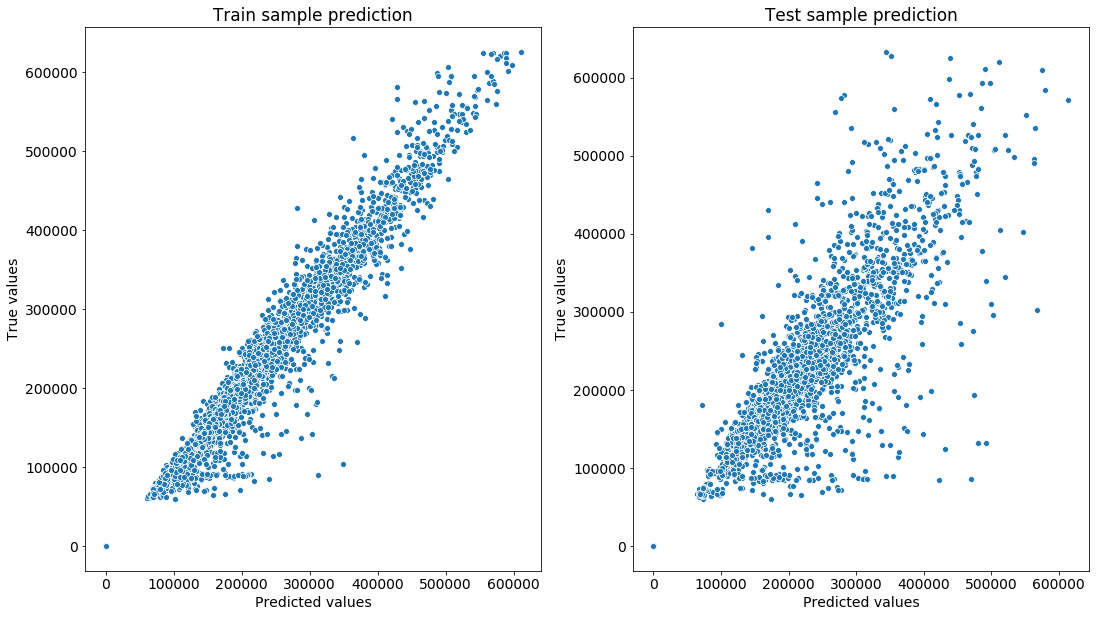

In [112]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [113]:
df_test = pd.read_csv(test_path)
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [115]:
df_test.loc[df_test['Rooms'].isin([0, 17])] = df_test['Rooms'].median()

In [117]:
df_test.loc[df_test['Square'] > 201] = df_test['Square'].median()

In [118]:
df_test.loc[df_test['Square'] < 15] = df_test['Square'].median()

In [120]:
df_test.loc[df_test['Rooms'] > 6] = df_test['Rooms'].median()

In [121]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2628.000000,5000.000000,5000.000000
mean,8394.570000,51.143200,1.908600,56.306597,36.035813,5.970800,8.617000,12.583000,1978.451200,0.125516,24.882800,5393.230400,8.211000,1139.200913,1.321600,4.237600
std,4844.610859,44.186138,0.806955,18.877045,17.757400,9.947871,5.474149,6.775743,109.998171,0.157932,17.551988,4031.615986,23.759777,1043.533839,1.478043,4.769119
min,1.000000,0.000000,1.000000,2.000000,0.333490,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,4204.000000,20.000000,1.000000,41.883259,23.049174,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000
50%,8315.000000,37.000000,2.000000,52.858985,32.886142,6.000000,7.000000,12.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,830.000000,1.000000,3.000000
75%,12589.250000,77.000000,2.000000,66.267531,45.096676,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000
max,16795.000000,212.000000,6.000000,189.679576,303.071094,620.000000,78.000000,99.000000,2020.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [122]:
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = df_test['LifeSquare'].median()

In [123]:
df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'LifeSquare'] = df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'LifeSquare'] * 0.63

In [124]:
df_test.loc[df_test['LifeSquare'] > 140] = df_test['LifeSquare'].median()

In [126]:
df_test.loc[df_test['Rooms'] > 6] = df_test['Rooms'].median()

In [128]:
df_test.loc[df_test['Square'] < 15] = df_test['Square'].median()

In [129]:
df_test.loc[df_test['LifeSquare'] < 10, 'LifeSquare'] = 25

In [130]:
df_test.loc[df_test['KitchenSquare'] > 35] = df_test['KitchenSquare'].median()

In [131]:
df_test.loc[df_test['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [132]:
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = 1

In [139]:
import random

In [140]:
floor_outliers = df_test.loc[df_test['Floor'] > df_test['HouseFloor']].index

df_test.loc[floor_outliers, 'Floor'] = df_test.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [141]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2639.000000,5000.000000,5000.000000
mean,8372.136400,51.05320,1.932400,56.111115,34.512691,6.396400,7.348800,12.605400,1972.488400,0.155175,24.881400,5386.010800,8.222200,1132.598712,1.350600,4.264600
std,4860.611029,44.21594,0.864858,18.911793,13.089897,3.044917,5.190272,6.709269,153.907534,0.469644,17.538143,4036.637965,23.730399,1044.595886,1.519652,4.765032
min,1.000000,0.00000,1.000000,6.000000,6.000000,3.000000,1.000000,1.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.500000,19.00000,1.000000,41.829778,25.000000,3.000000,3.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000
50%,8300.000000,37.00000,2.000000,52.744942,32.886142,6.000000,6.000000,12.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,830.000000,1.000000,3.000000
75%,12578.250000,77.00000,2.000000,66.225831,39.650767,9.000000,10.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,3.000000,6.000000
max,16795.000000,212.00000,6.000000,189.679576,136.921090,34.000000,46.000000,99.000000,2020.000000,6.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [146]:
df_test.loc[df_test['HouseFloor'] > 46, 'HouseFloor'] = 46

In [148]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2639.000000,5000.000000,5000.000000
mean,8372.136400,51.05320,1.932400,56.111115,34.512691,6.396400,7.348800,12.594000,1972.488400,0.155175,24.881400,5386.010800,8.222200,1132.598712,1.350600,4.264600
std,4860.611029,44.21594,0.864858,18.911793,13.089897,3.044917,5.190272,6.609773,153.907534,0.469644,17.538143,4036.637965,23.730399,1044.595886,1.519652,4.765032
min,1.000000,0.00000,1.000000,6.000000,6.000000,3.000000,1.000000,1.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.500000,19.00000,1.000000,41.829778,25.000000,3.000000,3.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000
50%,8300.000000,37.00000,2.000000,52.744942,32.886142,6.000000,6.000000,12.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,830.000000,1.000000,3.000000
75%,12578.250000,77.00000,2.000000,66.225831,39.650767,9.000000,10.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,3.000000,6.000000
max,16795.000000,212.00000,6.000000,189.679576,136.921090,34.000000,46.000000,46.000000,2020.000000,6.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [149]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     2639 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null object
dtypes: float64(16), object(3)
memory usage: 742.3+ KB


In [150]:
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df_test['Healthcare_1'].median()

In [151]:
df_test['Ecology_2'] = (df_test['Ecology_2'] == 'B').astype(int)
df_test['Ecology_3'] = (df_test['Ecology_3'] == 'B').astype(int)
df_test['Shops_2'] = (df_test['Shops_2'] == 'B').astype(int)

In [154]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int32
Ecology_3        5000 non-null int32
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null int32
dtypes: float64(16), int32(3)
memory usage: 683.7 KB


In [155]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8372.136400,51.05320,1.932400,56.111115,34.512691,6.396400,7.348800,12.594000,1972.488400,0.155175,0.984400,0.96420,24.881400,5386.010800,8.222200,989.711600,1.350600,4.264600,0.912400
std,4860.611029,44.21594,0.864858,18.911793,13.089897,3.044917,5.190272,6.609773,153.907534,0.469644,0.123934,0.18581,17.538143,4036.637965,23.730399,773.723028,1.519652,4.765032,0.282741
min,1.000000,0.00000,1.000000,6.000000,6.000000,3.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.500000,19.00000,1.000000,41.829778,25.000000,3.000000,3.000000,9.000000,1973.000000,0.019509,1.000000,1.00000,6.000000,1564.000000,0.000000,770.000000,0.000000,1.000000,1.000000
50%,8300.000000,37.00000,2.000000,52.744942,32.886142,6.000000,6.000000,12.000000,1977.000000,0.075424,1.000000,1.00000,25.000000,5285.000000,2.000000,830.000000,1.000000,3.000000,1.000000
75%,12578.250000,77.00000,2.000000,66.225831,39.650767,9.000000,10.000000,17.000000,2000.000000,0.195781,1.000000,1.00000,36.000000,7287.000000,5.000000,990.000000,3.000000,6.000000,1.000000
max,16795.000000,212.00000,6.000000,189.679576,136.921090,34.000000,46.000000,46.000000,2020.000000,6.000000,1.000000,1.00000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [156]:
df_test.to_csv(test_path, index=False, encoding='utf-8')

In [157]:
df_test = pd.read_csv(test_path)
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8372.136400,51.05320,1.932400,56.111115,34.512691,6.396400,7.348800,12.594000,1972.488400,0.155175,0.984400,0.96420,24.881400,5386.010800,8.222200,989.711600,1.350600,4.264600,0.912400
std,4860.611029,44.21594,0.864858,18.911793,13.089897,3.044917,5.190272,6.609773,153.907534,0.469644,0.123934,0.18581,17.538143,4036.637965,23.730399,773.723028,1.519652,4.765032,0.282741
min,1.000000,0.00000,1.000000,6.000000,6.000000,3.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.500000,19.00000,1.000000,41.829778,25.000000,3.000000,3.000000,9.000000,1973.000000,0.019509,1.000000,1.00000,6.000000,1564.000000,0.000000,770.000000,0.000000,1.000000,1.000000
50%,8300.000000,37.00000,2.000000,52.744942,32.886142,6.000000,6.000000,12.000000,1977.000000,0.075424,1.000000,1.00000,25.000000,5285.000000,2.000000,830.000000,1.000000,3.000000,1.000000
75%,12578.250000,77.00000,2.000000,66.225831,39.650767,9.000000,10.000000,17.000000,2000.000000,0.195781,1.000000,1.00000,36.000000,7287.000000,5.000000,990.000000,3.000000,6.000000,1.000000
max,16795.000000,212.00000,6.000000,189.679576,136.921090,34.000000,46.000000,46.000000,2020.000000,6.000000,1.000000,1.00000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [159]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null float64
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null int64
dtypes: float64(16), int64(3)
memory usage: 742.3 KB


In [161]:
Id_file = pd.DataFrame({'Id': df_test['Id']},
                         columns=['Id'])
Id_file.head()

,Id
0,725.0
1,15856.0
2,6.0
3,15664.0
4,14275.0


In [164]:
df_test = df_test[df_test.columns[1:]]

In [166]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
DistrictId       5000 non-null float64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null float64
Social_2         5000 non-null float64
Social_3         5000 non-null float64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null float64
Shops_1          5000 non-null float64
Shops_2          5000 non-null int64
dtypes: float64(15), int64(3)
memory usage: 703.2 KB


In [167]:
price = rf_model.predict(df_test)

In [169]:
price = pd.DataFrame({'Price': rf_model.predict(df_test)},
                    columns=['Price'])

In [176]:
test_original = pd.read_csv('test_original.csv')

In [178]:
Id = test_original['Id']
Id.head(10)

0      725
1    15856
2     5480
3    15664
4    14275
5     7633
6    13329
7     5502
8     4220
9    11538
Name: Id, dtype: int64

In [179]:
SShirkin_predictions = pd.DataFrame({'Id': test_original['Id'], 
                          'Price': rf_model.predict(df_test)},
                         columns=['Id', 'Price'])
SShirkin_predictions.head()

,Id,Price
0,725,167871.726062
1,15856,205827.249655
2,5480,6.000000
3,15664,366602.217823
4,14275,140786.771497


In [184]:
SShirkin_predictions.to_csv('SShirkin_predictions.csv', index=False, encoding='utf-8')

In [185]:
SShirkin_predictions.to_excel('SShirkin_predictions.xlsx', index=False, encoding='utf-8')

In [186]:
df_train.to_excel('df_train.xlsx', index=False, encoding='utf-8')